In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_petrol_consumption_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_petrol_consumption_test.csv')

In [4]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,38.0,7.646842,1.003737,5.000,7.000,7.5000,8.00000,10.000
Average_income,38.0,4272.921053,603.724314,3063.000,3739.000,4298.0000,4685.25000,5342.000
Paved_Highways,38.0,5744.973684,3717.940323,602.000,3329.250,4705.5000,7834.00000,17782.000
Population_Driver_licence(%),38.0,0.569447,0.057805,0.451,0.529,0.5645,0.59975,0.724
Petrol_Consumption,38.0,578.789474,118.610687,344.000,508.500,563.5000,634.25000,968.000


In [5]:
df_train.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.035224,-0.557169,-0.338274,-0.468701
Average_income,0.035224,1.000000,0.063792,0.130655,-0.221793
Paved_Highways,-0.557169,0.063792,1.000000,-0.128690,-0.065765
Population_Driver_licence(%),-0.338274,0.130655,-0.128690,1.000000,0.742374
Petrol_Consumption,-0.468701,-0.221793,-0.065765,0.742374,1.000000


In [6]:
X_train = df_train.drop(['Petrol_Consumption'],axis=1)
X_test = df_test.drop(['Petrol_Consumption'],axis=1)
y_train = df_train.Petrol_Consumption
y_test = df_test['Petrol_Consumption']

In [7]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)


In [30]:
# Linear Regression

model_lr = LinearRegression()
model_lr.fit(X_train_sc,y_train)
y_hat_lr = model_lr.predict(X_test_sc)

print(f'MSE: {np.sqrt(mean_squared_error(y_test,y_hat_lr))}')
print(f'R2: {r2_score(y_test,y_hat_lr)}')

rmse_lr = np.sqrt(mean_squared_error(y_test,y_hat_lr))
r2_lr = r2_score(y_test,y_hat_lr)

MSE: 63.900358932836966
R2: 0.3913664001428856


In [31]:
# Lasso

model_ls = Lasso(random_state=2014)
model_ls.fit(X_train_sc,y_train)
y_hat_ls = model_ls.predict(X_test_sc)

print(f'MSE: {np.sqrt(mean_squared_error(y_test,y_hat_ls))}')
print(f'R2: {r2_score(y_test,y_hat_ls)}')

rmse_ls = np.sqrt(mean_squared_error(y_test,y_hat_ls))
r2_ls = r2_score(y_test,y_hat_ls)

MSE: 63.57590818093325
R2: 0.39753132022876303


In [32]:
# Decision Tree

model_tr = DecisionTreeRegressor(random_state=2014)
model_tr.fit(X_train_sc,y_train)
y_hat_tr = model_tr.predict(X_test_sc)

print(f'MSE: {np.sqrt(mean_squared_error(y_test,y_hat_tr))}')
print(f'R2: {r2_score(y_test,y_hat_tr)}')

rmse_tr = np.sqrt(mean_squared_error(y_test,y_hat_tr))
r2_tr = r2_score(y_test,y_hat_tr)

MSE: 130.18755700910899
R2: -1.5263195550977877


In [33]:
# Random Forest

model_rf = RandomForestRegressor(random_state=2014)
model_rf.fit(X_train_sc,y_train)
y_hat_rf = model_rf.predict(X_test_sc)

print(f'MSE: {np.sqrt(mean_squared_error(y_test,y_hat_rf))}')
print(f'R2: {r2_score(y_test,y_hat_rf)}')

rmse_rf = np.sqrt(mean_squared_error(y_test,y_hat_rf))
r2_rf = r2_score(y_test,y_hat_rf)

MSE: 88.19885078616389
R2: -0.15951182386356022


In [34]:
# RandomForest with Grid Search
param_grid = {
    # RandomForestRegressor().get_params().keys()
    'max_depth':[3,4,5,6],
    'min_samples_split':[3,5,7],
    'random_state': [2014]
}

grid_search_rf = GridSearchCV(model_rf,param_grid=param_grid, n_jobs=-1)
grid_search_rf.fit(X_train_sc,y_train)
y_hat_gs_rf = grid_search_rf.predict(X_test_sc)

print(f'MSE: {np.sqrt(mean_squared_error(y_test,y_hat_gs_rf))}')
print(f'R2: {r2_score(y_test,y_hat_gs_rf)}')

rmse_gs_rf = np.sqrt(mean_squared_error(y_test,y_hat_gs_rf))
r2_gs_rf = r2_score(y_test,y_hat_gs_rf)

MSE: 77.23792570797185
R2: 0.11077731671406454


In [18]:
rmse_list = []

rmse_list.append(rmse_lr)
rmse_list.append(rmse_ls)
rmse_list.append(rmse_tr)
rmse_list.append(rmse_rf)
rmse_list.append(rmse_gs_rf)

In [35]:
r2_list = []

r2_list.append(r2_lr)
r2_list.append(r2_ls)
r2_list.append(r2_tr)
r2_list.append(r2_rf)
r2_list.append(r2_gs_rf)

In [37]:
cm =sns.light_palette('red', as_cmap=True)
model_compare = pd.DataFrame({'model_name':['linear regression','lasso','decision tree','random forest','grid search rf'],'RMSE':rmse_list, 'R2':r2_list})
model_compare.style.background_gradient(cmap=cm)

,model_name,RMSE,R2
0,linear regression,63.900359,0.391366
1,lasso,63.575908,0.397531
2,decision tree,130.187557,-1.526320
3,random forest,88.198851,-0.159512
4,grid search rf,77.237926,0.110777


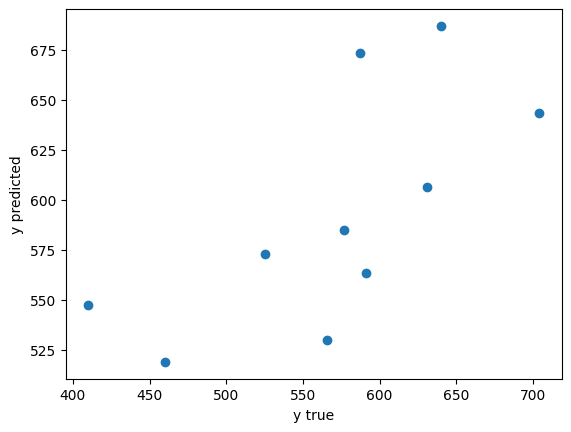

In [24]:
plt.scatter(x=y_test,y=y_hat_lr)
plt.xlabel('y true')
plt.ylabel('y predicted')
plt.show()

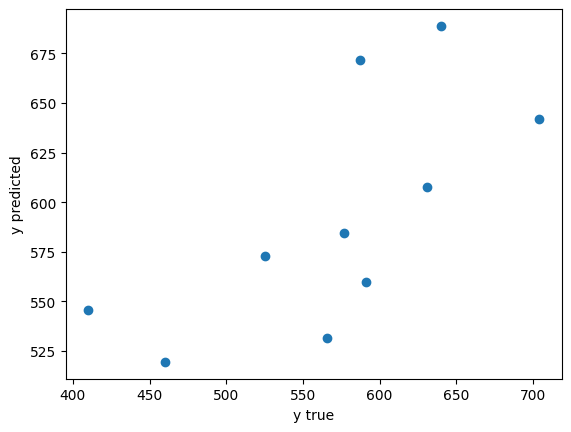

In [25]:
plt.scatter(x=y_test,y=y_hat_ls)
plt.xlabel('y true')
plt.ylabel('y predicted')
plt.show()

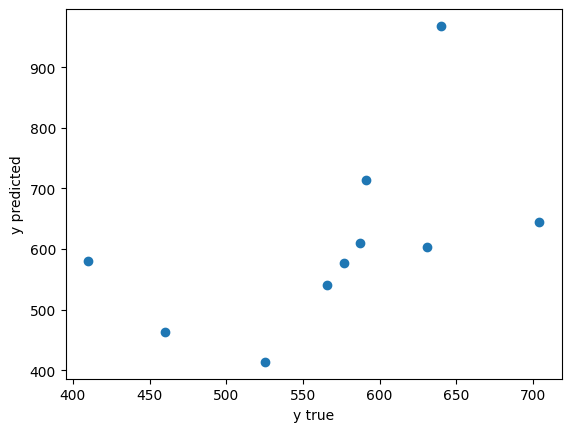

In [26]:
plt.scatter(x=y_test,y=y_hat_tr)
plt.xlabel('y true')
plt.ylabel('y predicted')
plt.show()

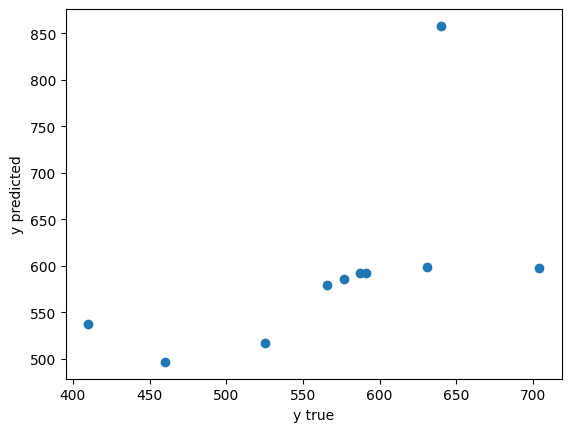

In [27]:
plt.scatter(x=y_test,y=y_hat_rf)
plt.xlabel('y true')
plt.ylabel('y predicted')
plt.show()

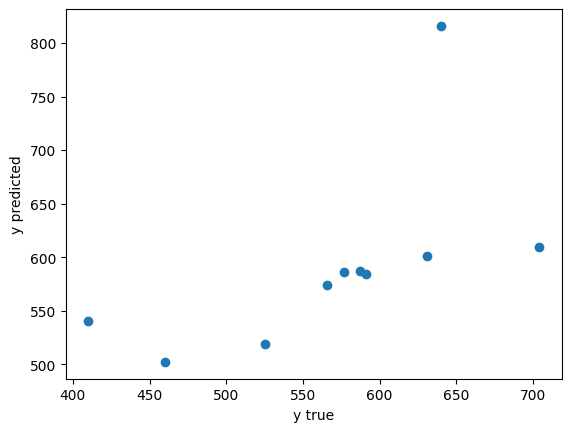

In [28]:
plt.scatter(x=y_test,y=y_hat_gs_rf)
plt.xlabel('y true')
plt.ylabel('y predicted')
plt.show()